In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

%matplotlib inline

# Import data
df = pd.read_csv("data/data_cummulative.csv");

# Set user groups from enabled features

# Abbreviations:
# - BG: User got no explanations (base group).
# - AE: User got explanations about the routing algorithm (alogorithm explanations).
# - NE: User got explanations depending on the active navigation (navigation explanations).
# - GE: User got both types of explanations (grouped explanations).

df.loc[(df['LowAccuracyCounter'].isna()), 'LowAccuracyCounter'] = 0
df.loc[(df['MaxLowAccuracy'].isna()), 'MaxLowAccuracy'] = 0
df.loc[(df['NumberOfUnnormalRoutes'].isna()), 'NumberOfUnnormalRoutes'] = 0
df.loc[(df['OffRoutePerTenKilometers'].isna()), 'OffRoutePerTenKilometers'] = 0
df.loc[(df['DistanceTraveledInMeters'].isna()), 'DistanceTraveledInMeters'] = 0
df.loc[(df['NumberOfTimesSeenUserCountExplanationShort'].isna()), 'NumberOfTimesSeenUserCountExplanationShort'] = 0
df.loc[(df['NumberOfTimesSeenUserCountExplanationLong'].isna()), 'NumberOfTimesSeenUserCountExplanationLong'] = 0
df.loc[(df['NumberOfTimesSeenCollaborativeRoutingExplanation'].isna()), 'NumberOfTimesSeenCollaborativeRoutingExplanation'] = 0

df["LowAccuracyPerKilometer"] = df["LowAccuracyCounter"] / (df["DistanceTraveledInMeters"] / 1000)
df.loc[(df['LowAccuracyPerKilometer'].isna()), 'LowAccuracyPerKilometer'] = 0

df.loc[(df['GpsQuality'] == False) & (df['TrafficVolume'] == False) & (df['RouteExplanation'] == False) & (df['UserCount'] == False), 'task'] = "BG"
df.loc[(df['GpsQuality'] == False) & (df['TrafficVolume'] == False) & (df['RouteExplanation'] == True) & (df['UserCount'] == True), 'task'] = "AE"
df.loc[(df['GpsQuality'] == True) & (df['TrafficVolume'] == True) & ((df['LowAccuracyCounter'] > 0) | (df['InitialTrafficVolume'] != "Normal")) & (df['RouteExplanation'] == False) & (df['UserCount'] == False), 'task'] = "NE"
df.loc[(df['GpsQuality'] == True) & (df['TrafficVolume'] == True) & ((df['LowAccuracyCounter'] > 0) | (df['InitialTrafficVolume'] != "Normal")) & (df['RouteExplanation'] == True) & (df['UserCount'] == True), 'task'] = "GE"
df.loc[(df['GpsQuality'] == True) & (df['TrafficVolume'] == True) & ((df['LowAccuracyCounter'] <= 0) & (df['InitialTrafficVolume'] == "Normal")) & (df['RouteExplanation'] == False) & (df['UserCount'] == False), 'task'] = "NE"
df.loc[(df['GpsQuality'] == True) & (df['TrafficVolume'] == True) & ((df['LowAccuracyCounter'] <= 0) & (df['InitialTrafficVolume'] == "Normal")) & (df['RouteExplanation'] == True) & (df['UserCount'] == True), 'task'] = "GE"

df.loc[(df['task'] == "BG"), 'group_named'] = "Gruppe 1"
df.loc[(df['task'] == "AE"), 'group_named'] = "Gruppe 2"
df.loc[(df['task'] == "NE"), 'group_named'] = "Gruppe 3"
df.loc[(df['task'] == "GE"), 'group_named'] = "Gruppe 4"

df = df[df['task'].notna()]

# Remove fields with redundant information
df = df.drop(columns=['GpsQuality', 'TrafficVolume', 'RouteExplanation', 'UserCount'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41540 entries, 0 to 41539
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          41540 non-null  object 
 1   numberOfRoutes                                    41540 non-null  int64  
 2   InitialTrafficVolume                              41540 non-null  object 
 3   DistanceTraveledInMeters                          41540 non-null  int64  
 4   OffRoutePerTenKilometers                          41540 non-null  float64
 5   LowAccuracyCounter                                41540 non-null  int64  
 6   Rating                                            696 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        41540 non-null  float64
 8   NumberOfTimesSeenUserCountExplanationLong         41540 non-null  float64
 9   NumberOfTimesSeen

In [2]:
g = df.groupby(['DeviceId', 'group_named']).mean()
grouped_data_raw = g.reset_index()

grouped_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9745 entries, 0 to 9744
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          9745 non-null   object 
 1   group_named                                       9745 non-null   object 
 2   numberOfRoutes                                    9745 non-null   float64
 3   DistanceTraveledInMeters                          9745 non-null   float64
 4   OffRoutePerTenKilometers                          9745 non-null   float64
 5   LowAccuracyCounter                                9745 non-null   float64
 6   Rating                                            201 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        9745 non-null   float64
 8   NumberOfTimesSeenUserCountExplanationLong         9745 non-null   float64
 9   NumberOfTimesSeenCo

In [3]:
g = df.groupby(['DeviceId', 'group_named', 'task']).mean()
grouped_data = g.reset_index()
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9745 entries, 0 to 9744
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          9745 non-null   object 
 1   group_named                                       9745 non-null   object 
 2   task                                              9745 non-null   object 
 3   numberOfRoutes                                    9745 non-null   float64
 4   DistanceTraveledInMeters                          9745 non-null   float64
 5   OffRoutePerTenKilometers                          9745 non-null   float64
 6   LowAccuracyCounter                                9745 non-null   float64
 7   Rating                                            201 non-null    float64
 8   NumberOfTimesSeenUserCountExplanationShort        9745 non-null   float64
 9   NumberOfTimesSeenUs

In [4]:
# Filter for unusable data
filtered_data = df

filtered_data = filtered_data[filtered_data['DistanceTraveledInMeters']>5000]
filtered_data = filtered_data[filtered_data['LowAccuracyPerKilometer']<0.2]

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16314 entries, 1 to 41528
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          16314 non-null  object 
 1   numberOfRoutes                                    16314 non-null  int64  
 2   InitialTrafficVolume                              16314 non-null  object 
 3   DistanceTraveledInMeters                          16314 non-null  int64  
 4   OffRoutePerTenKilometers                          16314 non-null  float64
 5   LowAccuracyCounter                                16314 non-null  int64  
 6   Rating                                            618 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        16314 non-null  float64
 8   NumberOfTimesSeenUserCountExplanationLong         16314 non-null  float64
 9   NumberOfTimesSeen

In [5]:
g = filtered_data.groupby(['DeviceId', 'group_named', 'task']).mean()
grouped_data_filtered = g.reset_index()
grouped_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          3975 non-null   object 
 1   group_named                                       3975 non-null   object 
 2   task                                              3975 non-null   object 
 3   numberOfRoutes                                    3975 non-null   float64
 4   DistanceTraveledInMeters                          3975 non-null   float64
 5   OffRoutePerTenKilometers                          3975 non-null   float64
 6   LowAccuracyCounter                                3975 non-null   float64
 7   Rating                                            181 non-null    float64
 8   NumberOfTimesSeenUserCountExplanationShort        3975 non-null   float64
 9   NumberOfTimesSeenUs

In [6]:
g = filtered_data.groupby('group_named')["DeviceId"].count()
grouped_data_task = g.reset_index()
grouped_data_task.head()

,group_named,DeviceId
0,Gruppe 1,4725
1,Gruppe 2,3377
2,Gruppe 3,4499
3,Gruppe 4,3713


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

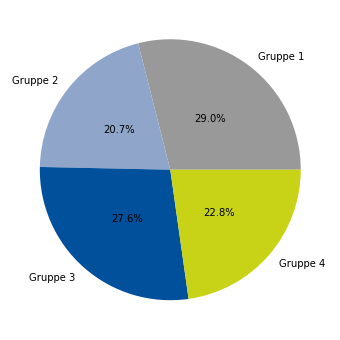

In [7]:
chartColors=["#999999", "#8FA6CA", "#00509B", "#C8D317", "#EE6429", "#E4AF8E"]
labels = grouped_data_task.group_named.sort_values()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=grouped_data_task["DeviceId"], autopct="%.1f%%", labels=labels, pctdistance=0.5, colors=chartColors)
plt

In [8]:
# Only use data relevant for offroute analysis

or_data = filtered_data

or_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16314 entries, 1 to 41528
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          16314 non-null  object 
 1   numberOfRoutes                                    16314 non-null  int64  
 2   InitialTrafficVolume                              16314 non-null  object 
 3   DistanceTraveledInMeters                          16314 non-null  int64  
 4   OffRoutePerTenKilometers                          16314 non-null  float64
 5   LowAccuracyCounter                                16314 non-null  int64  
 6   Rating                                            618 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        16314 non-null  float64
 8   NumberOfTimesSeenUserCountExplanationLong         16314 non-null  float64
 9   NumberOfTimesSeen

In [9]:
# Remove outliers
#
# > An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.
# > Removing outliers from a pandas.DataFrame removes any rows in the DataFrame which contain an outlier.
# > Outlier calculations are performed separately for each column.

or_data = or_data[np.abs(or_data.OffRoutePerTenKilometers-or_data.OffRoutePerTenKilometers.median())<=(3*or_data.OffRoutePerTenKilometers.std())]

or_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16149 entries, 1 to 41528
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          16149 non-null  object 
 1   numberOfRoutes                                    16149 non-null  int64  
 2   InitialTrafficVolume                              16149 non-null  object 
 3   DistanceTraveledInMeters                          16149 non-null  int64  
 4   OffRoutePerTenKilometers                          16149 non-null  float64
 5   LowAccuracyCounter                                16149 non-null  int64  
 6   Rating                                            616 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        16149 non-null  float64
 8   NumberOfTimesSeenUserCountExplanationLong         16149 non-null  float64
 9   NumberOfTimesSeen

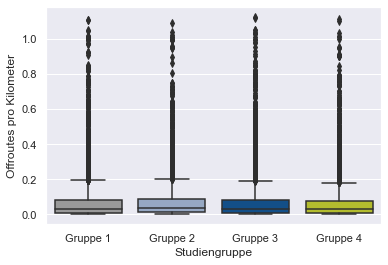

In [10]:
with sns.axes_style("darkgrid"):
    sns.set()
    sns.boxplot(data=df, x=or_data.group_named, y=or_data.OffRoutePerTenKilometers, order=["Gruppe 1", "Gruppe 2", "Gruppe 3", "Gruppe 4"], palette=chartColors).set(
        xlabel='Studiengruppe', 
        ylabel='Offroutes pro Kilometer'
    )
    plt.savefig('off_route_result_overview.pdf')
    plt.show()


In [11]:
#Test groups for normality.

experiments = ["BG", "AE", "NE", "GE"]

for e in experiments:
    print("Task ", e, " normality result: ", st.shapiro(or_data[or_data.task==e].OffRoutePerTenKilometers))
    print("Variance: ", or_data[or_data.task == e].OffRoutePerTenKilometers.var())


Task  BG  normality result:  ShapiroResult(statistic=0.562873125076294, pvalue=0.0)
Variance:  0.01671686858978522
Task  AE  normality result:  ShapiroResult(statistic=0.5934045314788818, pvalue=0.0)
Variance:  0.016187288382693794
Task  NE  normality result:  ShapiroResult(statistic=0.5683383941650391, pvalue=0.0)
Variance:  0.018509381024186342
Task  GE  normality result:  ShapiroResult(statistic=0.5524904131889343, pvalue=0.0)
Variance:  0.016356166819756983


p < 0.05 -> we can reject the 0-Hypotheses.

Groups are not normally distributed thus we have to take Kruskal Wallis instead of ANONVA

In [12]:
import pingouin as pg

res = pg.kruskal(data=or_data, dv='OffRoutePerTenKilometers', between='task')

print(res)

        Source  ddof1          H     p-unc
Kruskal   task      3  27.310418  0.000005


p < 0.05 --> we can reject the 0-Hypothesis.

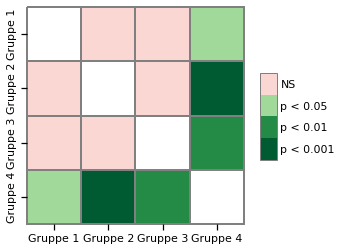

          Gruppe 1  Gruppe 2  Gruppe 3  Gruppe 4
Gruppe 1  1.000000  0.058917  1.000000  0.021712
Gruppe 2  0.058917  1.000000  0.296783  0.000002
Gruppe 3  1.000000  0.296783  1.000000  0.002947
Gruppe 4  0.021712  0.000002  0.002947  1.000000
Mean BG:  0.0753290481209403 BG:  0.0319824553387855  STD:  0.12929372989354596 
Mean AE:  0.07855468964540499 AE:  0.03547179509662015  STD:  0.1272292748650789 
Mean NE:  0.07904298108192226 NE:  0.03174066006831055  STD:  0.1360491860474966 
Mean GE:  0.07197611620183898 GE:  0.02865165470571035  STD:  0.1278912304255338 


In [13]:
import scipy.stats as st
import scikit_posthocs as sp
from statsmodels.stats.anova import AnovaRM

#pairwise testing:

pc = sp.posthoc_dunn(or_data, val_col="OffRoutePerTenKilometers", group_col='group_named', p_adjust="bonferroni")


heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.savefig('off_route_result_significance.pdf')
plt.show()
print(pc)

print("Mean BG: ", or_data[or_data.task == "BG"].OffRoutePerTenKilometers.mean(), "BG: ", or_data[or_data.task == "BG"].OffRoutePerTenKilometers.median(), " STD: ", or_data[or_data.task == "BG"].OffRoutePerTenKilometers.std(),"")
print("Mean AE: ", or_data[or_data.task == "AE"].OffRoutePerTenKilometers.mean(), "AE: ", or_data[or_data.task == "AE"].OffRoutePerTenKilometers.median(), " STD: ", or_data[or_data.task == "AE"].OffRoutePerTenKilometers.std(),"")
print("Mean NE: ", or_data[or_data.task == "NE"].OffRoutePerTenKilometers.mean(), "NE: ", or_data[or_data.task == "NE"].OffRoutePerTenKilometers.median(), " STD: ", or_data[or_data.task == "NE"].OffRoutePerTenKilometers.std(),"")
print("Mean GE: ", or_data[or_data.task == "GE"].OffRoutePerTenKilometers.mean(), "GE: ", or_data[or_data.task == "GE"].OffRoutePerTenKilometers.median(), " STD: ", or_data[or_data.task == "GE"].OffRoutePerTenKilometers.std(),"")


In [14]:
pg.pairwise_tukey(data=or_data, dv='OffRoutePerTenKilometers', between='task')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,AE,BG,0.078555,0.075329,0.003226,0.002956,1.091108,0.672717,0.024722
1,AE,GE,0.078555,0.071976,0.006579,0.003121,2.107868,0.150608,0.050419
2,AE,NE,0.078555,0.079043,-0.000488,0.002987,-0.163479,0.900000,-0.003742
3,BG,GE,0.075329,0.071976,0.003353,0.002876,1.165944,0.630714,0.025698
4,BG,NE,0.075329,0.079043,-0.003714,0.002730,-1.360604,0.521453,-0.028465
5,GE,NE,0.071976,0.079043,-0.007067,0.002907,-2.430858,0.071528,-0.054163
